In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat.processRoc(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=100,
           alpha=0.01,
           prevalence=.002)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

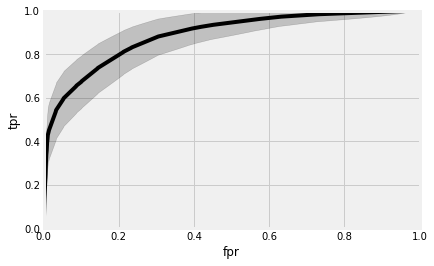

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

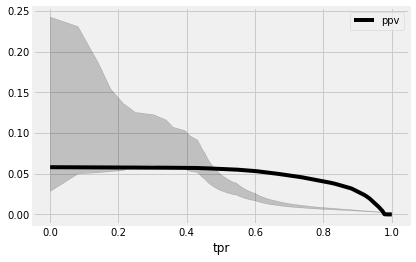

In [6]:
ax=plt.gca()
ax=zt.get().plot(ax=ax,x='tpr',y='ppv',color='k')
plt.fill_between(x=zt.get()['tpr'], y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)
#ax.set_xlim(0,1)
#ax.set_ylim(0,1)

In [7]:
# compute auc with confidence bounds
zt.auc(alpha=.05)

(0.8875903790087464, 0.9349670453101371, 0.8402137127073557)

In [8]:
# required sample size
zt.samplesize(delta_auc=.05)

264.79526815762136

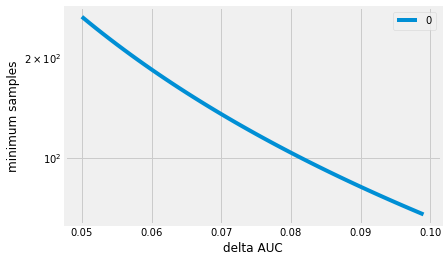

In [9]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

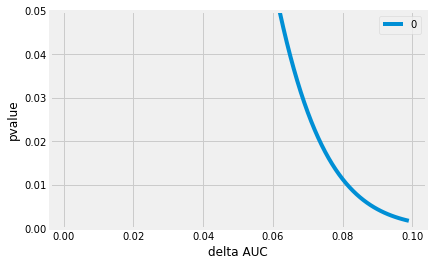

In [10]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
#plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [11]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

ValueError: too many values to unpack (expected 2)

## writing tables to latex

In [17]:
from zedstat.textable import textable
textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [11]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.008,$0.358 \pm 0.093$,$0.083 \pm 0.018$,$0.990 \pm 0.000$,$0.998 \pm 0.000$,$44.76 \pm 11.74$,$0.647 \pm 0.094$,0.234186
0.061,$0.611 \pm 0.095$,$0.019 \pm 0.003$,$0.938 \pm 0.000$,$0.999 \pm 0.000$,$10.01 \pm 1.566$,$0.414 \pm 0.101$,0.032108


In [12]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

# Second example: From raw samples

In [13]:
pf=pd.read_csv('./examples_data/id_predictions_M_2.csv',index_col=0)
pf

,pfsa_score,target,seq_score,pscore_score,rare_score,age_at_screening,predicted_risk,surgery_target_gap,RCRI_risk,fips
patient_id,,,,,,,,,,
P27273512701,0.003104,1,0.006088,0.003201,0.004751,66.980769,0.004362,2,0.039,48000
P29607128901,0.004028,1,0.016018,0.004410,0.004670,76.211538,0.020247,0,0.060,8000
P00702899701,0.003680,1,0.013655,0.003689,0.003735,67.769231,0.010662,0,0.060,36000
P00740374101,0.004483,1,0.007008,0.003862,0.007148,62.961538,0.007581,1,0.039,42000
P02559276601,0.003792,1,0.006803,0.004377,0.004036,74.211538,0.011139,0,0.060,4000
...,...,...,...,...,...,...,...,...,...,...
P00502780802,0.002666,0,0.003108,0.003924,0.004036,63.980769,0.003197,-414,0.039,26000
P00542466302,0.002666,0,0.002989,0.003983,0.003969,40.153846,0.003163,-267,0.039,13000
P01463512601,0.002666,0,0.003144,0.004064,0.009094,45.038462,0.003293,-521,0.039,26000


In [14]:
rf,total_samples,positive_samples=zedstat.genroc(pf,risk='predicted_risk',
           target='target',
           TARGET=[1])

<AxesSubplot:xlabel='fpr'>

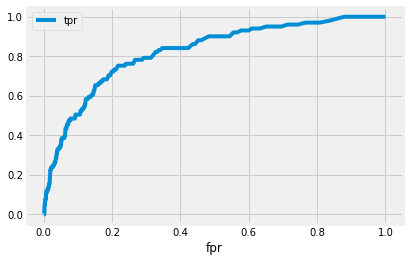

In [15]:
rf.plot(x='fpr',y='tpr')

In [16]:
zt1=zedstat.processRoc(df=rf,
           order=3, 
           total_samples=total_samples,
           positive_samples=positive_samples,
           alpha=0.05,
           prevalence=.002)

(0.8333015984752394, 0.8867962134684969, 0.7798145699895744)


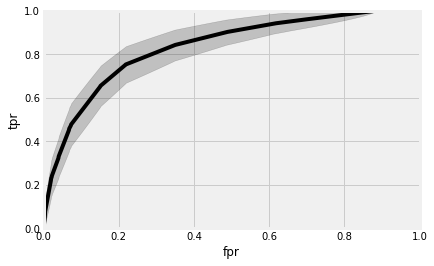

In [17]:
zt1.smooth(STEP=0.001)
zt1.allmeasures(interpolate=True)
zt1.usample(precision=3)
zt1.getBounds()
ax=plt.gca()
ax=zt1.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt1.get().index, y1=zt1.df_lim['U'].tpr,y2=zt1.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');
print(zt1.auc(alpha=.05))

In [18]:
zt1.samplesize(delta_auc=.1)

53.36172155502561

In [19]:
pf

,pfsa_score,target,seq_score,pscore_score,rare_score,age_at_screening,predicted_risk,surgery_target_gap,RCRI_risk,fips
patient_id,,,,,,,,,,
P27273512701,0.003104,1,0.006088,0.003201,0.004751,66.980769,0.004362,2,0.039,48000
P29607128901,0.004028,1,0.016018,0.004410,0.004670,76.211538,0.020247,0,0.060,8000
P00702899701,0.003680,1,0.013655,0.003689,0.003735,67.769231,0.010662,0,0.060,36000
P00740374101,0.004483,1,0.007008,0.003862,0.007148,62.961538,0.007581,1,0.039,42000
P02559276601,0.003792,1,0.006803,0.004377,0.004036,74.211538,0.011139,0,0.060,4000
...,...,...,...,...,...,...,...,...,...,...
P00502780802,0.002666,0,0.003108,0.003924,0.004036,63.980769,0.003197,-414,0.039,26000
P00542466302,0.002666,0,0.002989,0.003983,0.003969,40.153846,0.003163,-267,0.039,13000
P01463512601,0.002666,0,0.003144,0.004064,0.009094,45.038462,0.003293,-521,0.039,26000


In [20]:
zedstat.pipeline(pf,
                 risk='predicted_risk',
                 target='target',
                 TARGET=[1],
                 order=3,
                 alpha=0.05,
                 prevalence=.002,
                 precision=3,
                 outfile='tmp.csv')

(       tpr       ppv       acc       npv        LR+  LR-  threshold  \
 fpr                                                                   
 0.000  0.0  0.020644  0.998000  0.998000  15.354918  1.0   0.073261   
 0.000  0.0  0.020644  0.998000  0.998000  15.354918  1.0   0.073261   
 0.000  0.0  0.020644  0.998000  0.998000  15.354918  1.0   0.073261   
 0.000  0.0  0.020644  0.998000  0.998000  15.354918  1.0   0.073261   
 0.000  0.0  0.047632  0.998000  0.998000  15.156938  1.0   0.073191   
 ...    ...       ...       ...       ...        ...  ...        ...   
 0.996  1.0  0.002008  0.005992  1.000000   1.004016  0.0   0.002865   
 0.997  1.0  0.002006  0.004994  1.000000   1.003009  0.0   0.002865   
 0.998  1.0  0.002004  0.003996  1.000000   1.002004  0.0   0.002864   
 0.999  1.0  0.002002  0.002998  1.000000   1.001001  0.0   0.002864   
 1.000  1.0  0.000000  0.002000  1.000163   1.000000  0.0   0.002863   
 
        tpr_upper  ppv_upper  acc_upper  ...  LR+_upper  LR-_u